In [1]:
#imoport some packages to use 
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

#To see our directory 
import os 
import random 
import gc #Gabage collector for cleanning data from memory 
from skimage import io, data_dir

In [2]:
train_dir = 'train1'
train_imgs = ['train1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'test1'
test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)

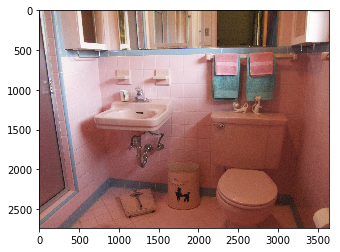

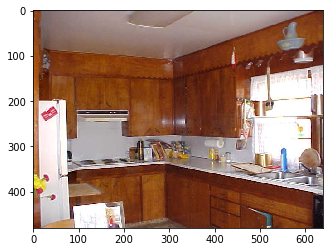

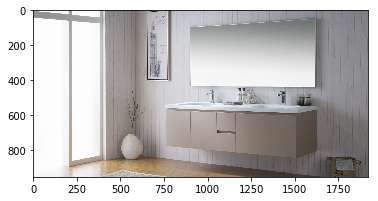

In [3]:
import matplotlib.image as mpimg
for ima in train_imgs[0:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [4]:
from tensorflow.keras import backend
from tensorflow.keras.models import Sequential
from scipy.misc import imread
get_ipython().magic('matplotlib inline')
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras
from tensorflow.keras.layers import Dense
import pandas as pd

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
import numpy as np
from tensorflow.keras.applications.vgg19 import decode_predictions

In [5]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(2271, 224, 224, 3)
<class 'numpy.ndarray'>
(330, 224, 224, 3)


In [6]:
# A function to read and process the images to an acceptable format for our model 
def read_and_process_images(list_of_images):
    #Returns one array
   
    #y is an array of labels
   
    y = [] # labels
    for image in list_of_images:
       
    
        if 'bathroom'  in image:
            if 'new' in image:
                y.append(0)
            else:  
                y.append(1)
        if 'bedroom'  in image:
            if 'new' in image:
                y.append(2)
            else: 
                y.append(3)
        if 'kitchen'  in image:
            if 'new' in image:
                y.append(4)
            if 'old' in image:
                y.append(5)
    return y

In [7]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)


2271
<class 'list'>
2271
<class 'numpy.ndarray'>
(2271,)
<class 'numpy.ndarray'>
(2271, 6)
330
<class 'list'>
330
<class 'numpy.ndarray'>
(330,)
<class 'numpy.ndarray'>
(330, 6)


# VGG19_MODEL1

In [8]:
# loading VGG19 model weights
model = VGG19(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
features_test=model.predict(test_img)
print(features_train.shape)



(2271, 7, 7, 512)


In [9]:
train_x=features_train.reshape(length_train,25088)
test_x = features_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.3, random_state=42)
print(len(X_train))
print(X_train.shape)

1589
(1589, 25088)


In [21]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation
from keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras import callbacks

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(units=6))
model.add(Activation('softmax'))

adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 

es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30)

history = model.fit(X_train, Y_train, epochs=40, batch_size=256,validation_data=(X_valid,Y_valid),callbacks=[es_callback])
#history = model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_valid,Y_valid))

Train on 1589 samples, validate on 682 samples
Epoch 1/40
1589/1589 [==============================] - 2s 1ms/sample - loss: 1.7597 - accuracy: 0.3216 - val_loss: 1.4945 - val_accuracy: 0.4384
Epoch 2/40
1589/1589 [==============================] - 1s 871us/sample - loss: 1.3285 - accuracy: 0.6967 - val_loss: 1.1445 - val_accuracy: 0.7141
Epoch 3/40
1589/1589 [==============================] - 1s 904us/sample - loss: 0.9820 - accuracy: 0.7898 - val_loss: 0.8695 - val_accuracy: 0.7683
Epoch 4/40
1589/1589 [==============================] - 1s 841us/sample - loss: 0.6873 - accuracy: 0.8603 - val_loss: 0.6886 - val_accuracy: 0.8094
Epoch 5/40
1589/1589 [==============================] - 1s 836us/sample - loss: 0.4925 - accuracy: 0.8999 - val_loss: 0.6069 - val_accuracy: 0.8021
Epoch 6/40
1589/1589 [==============================] - 1s 837us/sample - loss: 0.3516 - accuracy: 0.9434 - val_loss: 0.5790 - val_accuracy: 0.8152
Epoch 7/40
1589/1589 [==============================] - 1s 849us/sa

In [ ]:
#save the model 
model.save_weights('model_wieghts.h5')
model.save('model_keras.h5')

<Figure size 432x288 with 0 Axes>

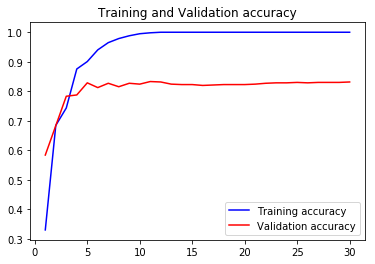

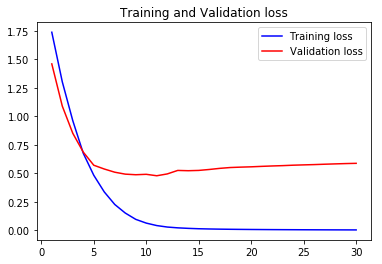

<Figure size 432x288 with 0 Axes>

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.figure()




In [16]:
pred_y=model.predict(test_x)
print(test_y.shape)
print(pred_y.shape)


(330, 6)
(330, 6)


In [22]:


pred_y = model.predict(test_x)

Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)
    
  
    if i == length_test: 
        break

#print(type(Y_pred))
#Y_pred = np.array(Y_pred)
Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][0] > 0.5:
        Y_test.append(0)
    elif test_y[i][1] > 0.5:
        Y_test.append(1)
    elif test_y[i][2] > 0.5:
        Y_test.append(2)
    elif test_y[i][3] > 0.5:
        Y_test.append(3) 
    elif test_y[i][4] > 0.5:
        Y_test.append(4) 
    else:
        Y_test.append(5) 
    i +=1 
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)


(330,)
<class 'numpy.ndarray'>
[3 4 1 4 4 3 2 1 1 0 0 0 2 0 2 0 0 4 0 4 5 5 1 0 2 1 5 2 4 4 2 1 3 1 1 4 0
 5 1 0 2 2 2 5 5 5 0 5 1 0 0 4 4 1 2 5 2 5 3 0 0 3 0 1 4 0 0 4 3 4 0 4 4 4
 1 0 5 4 1 3 0 5 4 1 3 2 0 5 4 5 4 0 0 4 0 1 3 5 0 2 5 0 5 1 5 1 1 3 4 1 5
 4 2 0 4 2 4 0 4 5 1 4 2 4 2 1 0 0 1 4 1 5 5 0 1 4 5 0 1 4 3 0 5 4 5 4 3 4
 2 3 2 3 5 1 0 5 0 4 3 5 4 5 3 3 1 4 0 2 4 2 1 1 2 3 0 1 3 4 0 3 4 1 3 4 2
 0 2 5 3 4 4 2 3 3 2 4 5 3 4 0 1 0 5 1 4 5 1 5 1 0 3 2 0 5 1 0 3 5 1 0 0 3
 3 3 2 0 5 0 0 4 3 2 5 3 2 4 3 4 0 4 2 2 2 1 4 0 5 0 2 4 3 3 0 5 0 5 1 5 3
 4 4 5 5 3 4 2 0 4 0 0 2 1 2 2 5 5 3 5 0 0 4 4 2 5 3 0 2 3 4 2 2 5 2 4 4 5
 0 0 1 0 1 0 2 0 5 1 0 2 1 1 2 1 3 2 1 5 0 4 2 2 5 5 4 0 4 5 1 1 1 0]
<class 'list'>
(330,)
<class 'numpy.ndarray'>
[3 4 1 4 4 3 3 1 1 0 0 1 2 0 2 1 4 4 0 4 5 1 1 0 2 1 1 3 4 5 2 1 3 1 1 4 0
 5 1 1 2 2 2 5 5 5 2 4 3 5 4 4 4 1 2 5 2 4 3 0 0 3 0 1 4 0 0 4 3 4 0 3 4 4
 1 0 5 4 1 3 0 5 4 1 3 2 0 5 4 5 5 0 5 4 0 1 3 3 0 2 1 0 5 1 5 5 1 3 4 1 4
 4 2 2 4 2 4 0 4 5 1 4 2 4 2

array([[55,  2,  1,  0,  2,  0],
       [ 8, 46,  0,  0,  1,  5],
       [ 2,  0, 40,  6,  0,  2],
       [ 1,  1,  7, 35,  3,  3],
       [ 2,  0,  1,  0, 51,  6],
       [ 2,  2,  0,  0,  7, 39]])

# Data Augumenation 1

In [23]:
train_dir = 'trainpreview'
train_imgs = ['trainpreview/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'test1'
test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test = len(test_imgs)


In [24]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)

print(type(train_img))
print(train_img.shape)



<class 'numpy.ndarray'>
(9076, 224, 224, 3)


In [25]:
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(330, 224, 224, 3)


In [26]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)

test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)



9076
<class 'list'>
9076
<class 'numpy.ndarray'>
(9076,)
<class 'numpy.ndarray'>
(9076, 6)
330
<class 'list'>
330
<class 'numpy.ndarray'>
(330,)
<class 'numpy.ndarray'>
(330, 6)


In [28]:
# loading VGG16 model weights
model = VGG19(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)

features_test=model.predict(test_img)
print(features_train.shape)



(9076, 7, 7, 512)


In [29]:
train_x=features_train.reshape(length_train,25088)
test_x=features_test.reshape(length_test,25088)
# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.2, random_state=42)
print(len(X_train))
print(X_train.shape)

7260
(7260, 25088)


In [37]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation
from tensorflow.keras import callbacks
model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=6))
model.add(Activation('softmax'))




model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 
es_callback =tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(X_train, Y_train, epochs=10, batch_size=256,validation_data=(X_valid,Y_valid),callbacks=[es_callback])
#history = model.fit(X_train, Y_train, epochs=20, batch_size=128,validation_data=(X_valid,Y_valid))

#history = model.fit(X_train, Y_train, epochs=10, batch_size=256,validation_data=(X_valid,Y_valid))

Train on 7260 samples, validate on 1816 samples
Epoch 1/10
7260/7260 [==============================] - 6s 772us/sample - loss: 1.3496 - accuracy: 0.5464 - val_loss: 0.8852 - val_accuracy: 0.7175
Epoch 2/10
7260/7260 [==============================] - 5s 721us/sample - loss: 0.6312 - accuracy: 0.8085 - val_loss: 0.5897 - val_accuracy: 0.7952
Epoch 3/10
7260/7260 [==============================] - 5s 717us/sample - loss: 0.3324 - accuracy: 0.9059 - val_loss: 0.4878 - val_accuracy: 0.8188
Epoch 4/10
7260/7260 [==============================] - 5s 720us/sample - loss: 0.1679 - accuracy: 0.9601 - val_loss: 0.4681 - val_accuracy: 0.8387
Epoch 5/10
7260/7260 [==============================] - 5s 719us/sample - loss: 0.0642 - accuracy: 0.9891 - val_loss: 0.4729 - val_accuracy: 0.8387
Epoch 6/10
7260/7260 [==============================] - 5s 722us/sample - loss: 0.0273 - accuracy: 0.9978 - val_loss: 0.4823 - val_accuracy: 0.8458
Epoch 7/10
7260/7260 [==============================] - 5s 743us

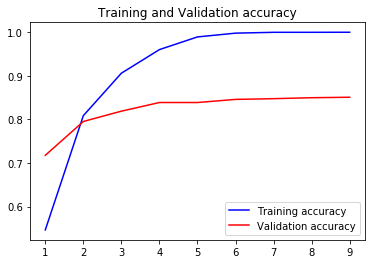

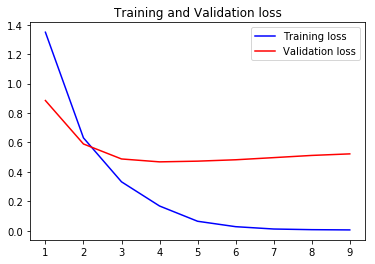

In [38]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)

#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')

plt.legend()

plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [39]:
pred_y = model.predict(test_x)
Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)
    
  
    if i == length_test: 
        break

#print(type(Y_pred))
#Y_pred = np.array(Y_pred)
Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][0] > 0.5:
        Y_test.append(0)
    elif test_y[i][1] > 0.5:
        Y_test.append(1)
    elif test_y[i][2] > 0.5:
        Y_test.append(2)
    elif test_y[i][3] > 0.5:
        Y_test.append(3) 
    elif test_y[i][4] > 0.5:
        Y_test.append(4) 
    else:
        Y_test.append(5) 
    i +=1 
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)




(330,)
<class 'numpy.ndarray'>
[1 0 1 3 2 5 3 4 0 2 3 0 1 0 2 5 0 5 4 4 0 5 4 2 2 0 2 2 0 1 2 1 4 5 4 2 1
 4 2 4 1 5 4 0 5 3 4 2 2 1 1 4 4 0 4 4 4 3 2 1 0 1 3 3 0 1 0 4 0 5 5 3 1 1
 4 5 2 5 1 0 2 2 5 2 3 3 1 0 3 0 0 3 0 4 0 5 4 3 0 1 4 5 1 0 4 3 2 0 3 2 4
 3 4 3 0 0 3 1 0 5 2 3 4 1 4 5 3 0 0 0 5 1 3 1 0 4 4 1 3 2 3 4 1 0 5 2 4 4
 1 4 0 1 5 1 2 2 4 2 1 4 0 0 0 1 3 5 4 3 0 1 2 3 0 0 3 3 2 2 3 1 0 0 2 5 1
 4 1 0 3 0 4 0 1 0 1 5 4 0 0 4 4 2 4 0 2 4 4 4 0 2 0 2 1 2 5 5 4 0 0 4 3 4
 0 1 2 1 0 4 2 1 1 5 3 4 4 2 4 5 2 0 5 3 1 2 5 2 2 4 4 5 1 2 0 4 4 4 2 4 2
 0 5 2 2 1 4 0 0 3 1 1 0 5 3 2 5 1 2 0 2 1 4 0 3 0 0 0 5 2 2 5 4 3 4 0 2 5
 1 3 4 1 4 4 1 4 1 2 1 0 3 5 4 0 5 0 0 0 4 1 2 3 0 1 1 1 4 1 0 3 3 2]
<class 'list'>
(330,)
<class 'numpy.ndarray'>
[1 0 1 3 2 5 3 5 0 2 3 0 1 0 2 5 0 5 5 4 0 5 4 2 2 0 2 2 0 1 0 1 4 5 4 2 1
 2 3 4 1 5 4 0 5 3 4 3 3 1 1 4 4 3 5 4 1 3 2 1 1 1 3 2 1 5 0 5 4 5 5 3 1 1
 4 5 3 5 1 0 2 2 5 2 3 3 1 1 3 0 0 3 0 5 0 3 4 3 0 1 4 3 1 0 4 3 2 0 3 2 4
 3 5 3 0 3 3 1 0 5 2 3 4 1 4

array([[55,  2,  2,  0,  1,  0],
       [ 8, 50,  0,  0,  2,  0],
       [ 2,  0, 43,  3,  1,  1],
       [ 2,  0,  7, 38,  1,  2],
       [ 4,  1,  2,  1, 49,  3],
       [ 1,  4,  1,  0, 13, 31]])

Result one, batchsize = 256

0.836

# Batchsize  = 8 

In [5]:
train_dir = 'trainpreview1'
train_imgs = ['trainpreview1/{}'.format(i) for i in os.listdir(train_dir)]
test_dir = 'test1'
test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)]
random.shuffle(train_imgs)
random.shuffle(test_imgs)
length_train = len(train_imgs)
length_test= len(test_imgs)


In [6]:
from scipy.misc import imresize
train_img=[]
for i in range(length_train):

    temp_img=image.load_img(train_imgs[i],target_size=(224,224))
    
    temp_img=image.img_to_array(temp_img)

    train_img.append(temp_img)
    
train_img=np.array(train_img) 
train_img=preprocess_input(train_img)


print(type(train_img))
print(train_img.shape)
test_img=[]
for i in range(length_test):

    temp_img=image.load_img(test_imgs[i],target_size=(224,224))

    temp_img=image.img_to_array(temp_img)

    test_img.append(temp_img)
    
test_img=np.array(test_img) 
test_img=preprocess_input(test_img)
print(type(test_img))
print(test_img.shape)

<class 'numpy.ndarray'>
(18037, 224, 224, 3)
<class 'numpy.ndarray'>
(330, 224, 224, 3)


In [7]:
train_y = read_and_process_images(train_imgs)
print(len(train_y))
print(type(train_y))
train_y = np.array(train_y)
print(len(train_y))
print(type(train_y))
print(train_y.shape)
train_y = np.array(train_y)
train_y=pd.get_dummies(train_y)
train_y=np.array(train_y)
print(type(train_y))
print(train_y.shape)
test_y = read_and_process_images(test_imgs)
print(len(test_y))
print(type(test_y))
test_y = np.array(test_y)
print(len(test_y))
print(type(test_y))
print(test_y.shape)
test_y = np.array(test_y)
test_y=pd.get_dummies(test_y)
test_y=np.array(test_y)
print(type(test_y))
print(test_y.shape)



18037
<class 'list'>
18037
<class 'numpy.ndarray'>
(18037,)
<class 'numpy.ndarray'>
(18037, 6)
330
<class 'list'>
330
<class 'numpy.ndarray'>
(330,)
<class 'numpy.ndarray'>
(330, 6)


In [9]:
# loading VGG16 model weights
model = VGG19(weights='imagenet', include_top=False)
# Extracting features from the train dataset using the VGG16 pre-trained model
features_train=model.predict(train_img)
features_test=model.predict(test_img)
print(features_train.shape)




(18037, 7, 7, 512)


In [34]:
train_x=features_train.reshape(length_train,25088)
test_x = features_test.reshape(length_test,25088)

# creating training and validation set
from sklearn.model_selection import train_test_split
X_train, X_valid, Y_train, Y_valid=train_test_split(train_x,train_y,test_size=0.2, random_state=42)
print(len(X_train))
print(X_train.shape)

14429
(14429, 25088)


In [38]:
# creating a mlp model
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import  Activation

model=Sequential()

model.add(Dense(1000, input_dim=25088, activation='relu',kernel_initializer='uniform'))
tensorflow.keras.layers.Dropout(0.3, noise_shape=None, seed=None)

model.add(Dense(500,input_dim=1000,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.4, noise_shape=None, seed=None)

model.add(Dense(150,input_dim=500,activation='sigmoid'))
tensorflow.keras.layers.Dropout(0.2, noise_shape=None, seed=None)

model.add(Dense(units=6))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

#model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

# fitting the model 


history = model.fit(X_train, Y_train, epochs=10, batch_size=256,validation_data=(X_valid,Y_valid))

Train on 14429 samples, validate on 3608 samples
Epoch 1/10
14429/14429 [==============================] - 11s 768us/sample - loss: 1.0175 - accuracy: 0.6526 - val_loss: 0.5888 - val_accuracy: 0.7974
Epoch 2/10
14429/14429 [==============================] - 10s 718us/sample - loss: 0.3966 - accuracy: 0.8759 - val_loss: 0.4244 - val_accuracy: 0.8404
Epoch 3/10
14429/14429 [==============================] - 10s 722us/sample - loss: 0.1760 - accuracy: 0.9498 - val_loss: 0.3701 - val_accuracy: 0.8642
Epoch 4/10
14429/14429 [==============================] - 10s 726us/sample - loss: 0.0661 - accuracy: 0.9849 - val_loss: 0.3543 - val_accuracy: 0.8789
Epoch 5/10
14429/14429 [==============================] - 10s 721us/sample - loss: 0.0220 - accuracy: 0.9966 - val_loss: 0.3723 - val_accuracy: 0.8850
Epoch 6/10
14429/14429 [==============================] - 10s 725us/sample - loss: 0.0075 - accuracy: 0.9996 - val_loss: 0.3668 - val_accuracy: 0.8952
Epoch 7/10
14429/14429 [=====================

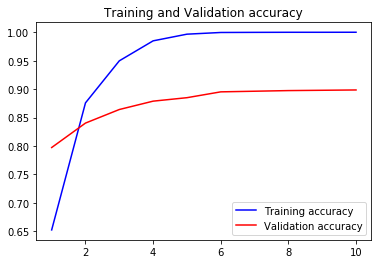

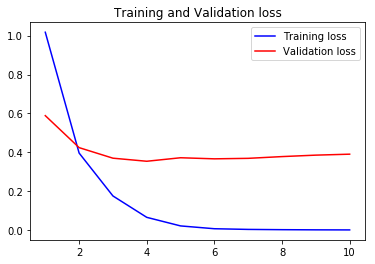

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =  range(1,len(acc)+1)


#train and validation accuracy 
plt.plot(epochs, acc, 'b', label ='Training accuracy')
plt.plot(epochs, val_acc, 'r', label ='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()


plt.figure()


#Train and validation loss
plt.plot(epochs, loss, 'b', label ='Training loss')
plt.plot(epochs, val_loss, 'r', label ='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [40]:
pred_y = model.predict(test_x)
Y_pred =[]
for i in range(length_test):
    idx = np.argmax(pred_y, axis=1)
    
  
    if i == length_test: 
        break

#print(type(Y_pred))
#Y_pred = np.array(Y_pred)
Y_pred = idx
print(Y_pred.shape)
print(type(Y_pred))
print(Y_pred)
Y_test =[]
for i in range(length_test):
    
    if test_y[i][0] > 0.5:
        Y_test.append(0)
    elif test_y[i][1] > 0.5:
        Y_test.append(1)
    elif test_y[i][2] > 0.5:
        Y_test.append(2)
    elif test_y[i][3] > 0.5:
        Y_test.append(3) 
    elif test_y[i][4] > 0.5:
        Y_test.append(4) 
    else:
        Y_test.append(5) 
    i +=1 
    if i == length_test: 
        break


print(type(Y_test))
Y_test = np.array(Y_test)
print(Y_test.shape)
print(type(Y_test))
print(Y_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)





(330,)
<class 'numpy.ndarray'>
[5 1 4 4 0 2 0 0 0 4 3 1 1 0 3 4 2 0 1 2 4 5 4 1 4 4 1 2 2 0 4 5 2 0 1 4 0
 1 0 4 5 4 1 4 2 0 4 4 3 4 0 5 3 2 0 4 3 3 4 3 5 4 2 2 0 4 1 0 5 5 5 4 1 5
 4 0 3 4 1 3 4 2 4 1 4 1 0 2 3 0 0 1 2 0 1 4 4 4 3 5 2 3 1 4 5 3 5 0 4 3 3
 2 0 0 0 2 4 4 4 1 4 2 0 1 0 3 4 1 1 1 2 2 0 5 3 5 0 3 3 5 0 0 1 3 0 2 3 1
 2 1 0 3 4 1 2 3 1 4 2 0 5 2 4 5 3 1 4 0 4 0 4 4 2 1 1 4 4 2 5 5 1 2 0 5 5
 0 1 2 5 4 4 4 1 1 0 3 0 0 0 0 0 1 1 2 2 3 0 1 1 5 5 1 0 0 1 0 1 5 0 4 4 4
 3 1 0 4 1 1 4 0 0 3 4 2 0 2 0 3 3 3 5 0 5 5 4 1 2 2 0 3 4 2 3 2 1 4 0 1 5
 4 5 2 1 4 3 0 4 2 0 2 3 0 0 3 4 1 3 2 2 0 0 4 1 1 4 4 0 4 1 3 1 3 1 0 0 4
 0 1 3 5 3 3 2 2 0 0 1 4 5 3 0 1 4 1 3 0 2 2 3 0 0 2 5 3 2 3 1 4 0 2]
<class 'list'>
(330,)
<class 'numpy.ndarray'>
[5 1 5 4 0 2 0 5 1 4 3 1 1 1 3 5 0 4 1 2 2 5 4 1 4 4 1 2 3 0 4 5 2 0 1 4 0
 1 0 4 3 5 1 4 3 0 4 4 3 4 0 5 3 2 0 4 3 3 4 3 5 4 2 2 0 4 1 0 5 5 2 5 1 5
 4 0 2 5 1 3 5 2 5 1 4 1 0 2 3 0 0 5 2 0 1 3 4 5 3 5 2 3 1 4 5 3 4 0 4 3 3
 2 0 1 0 2 4 2 4 1 4 2 4 0 0

array([[54,  4,  1,  0,  1,  0],
       [10, 48,  0,  0,  0,  2],
       [ 2,  0, 40,  5,  2,  1],
       [ 0,  0,  7, 39,  2,  2],
       [ 5,  1,  0,  2, 49,  3],
       [ 2,  6,  0,  1, 15, 26]])